# Supervised Learning: Take Home
In this assignment, you will have 3 tasks:
1. Build a LMS model to predict diabetic health outcomes from a dataset
2. Split the data intro training and validation sets and provide your rationale for your choice
3. Rank features by most impactful to least impactful for your model's prediction on validation data, and explain how you determined your ranking

You will be graded on the following criteria
- Did you complete all 3 tasks?
- Did you show your work?
    - Using `sklearn.linear_model.LinearRegression` is an auto fail
    - Copying code from Kaggle or elsewhere will also be a fail :) 
    - Feel free to use the lecture notebook code though.
- Did you write readable code, meaning...
    - Clearly named variables
    - Re-used code is put in functions
    - Comments and markdown where appropriate to explain your decision making

The only allowed external libraries to complete this assignment are `numpy` and `matplotlib` for visualization (optional).

In [23]:
#fetch the diabetes dataset
#https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset for more information
from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

dataset = load_diabetes()
print(dataset['feature_names'])
x = dataset['data']
y = dataset['target']

#dont forget to add the bias term!
x = np.column_stack([x, np.ones(x.shape[0])])
print(x.shape)
print(y.shape)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
(442, 11)
(442,)


### Explore your dataset, decide on splitting strategy

Explain your reasoning

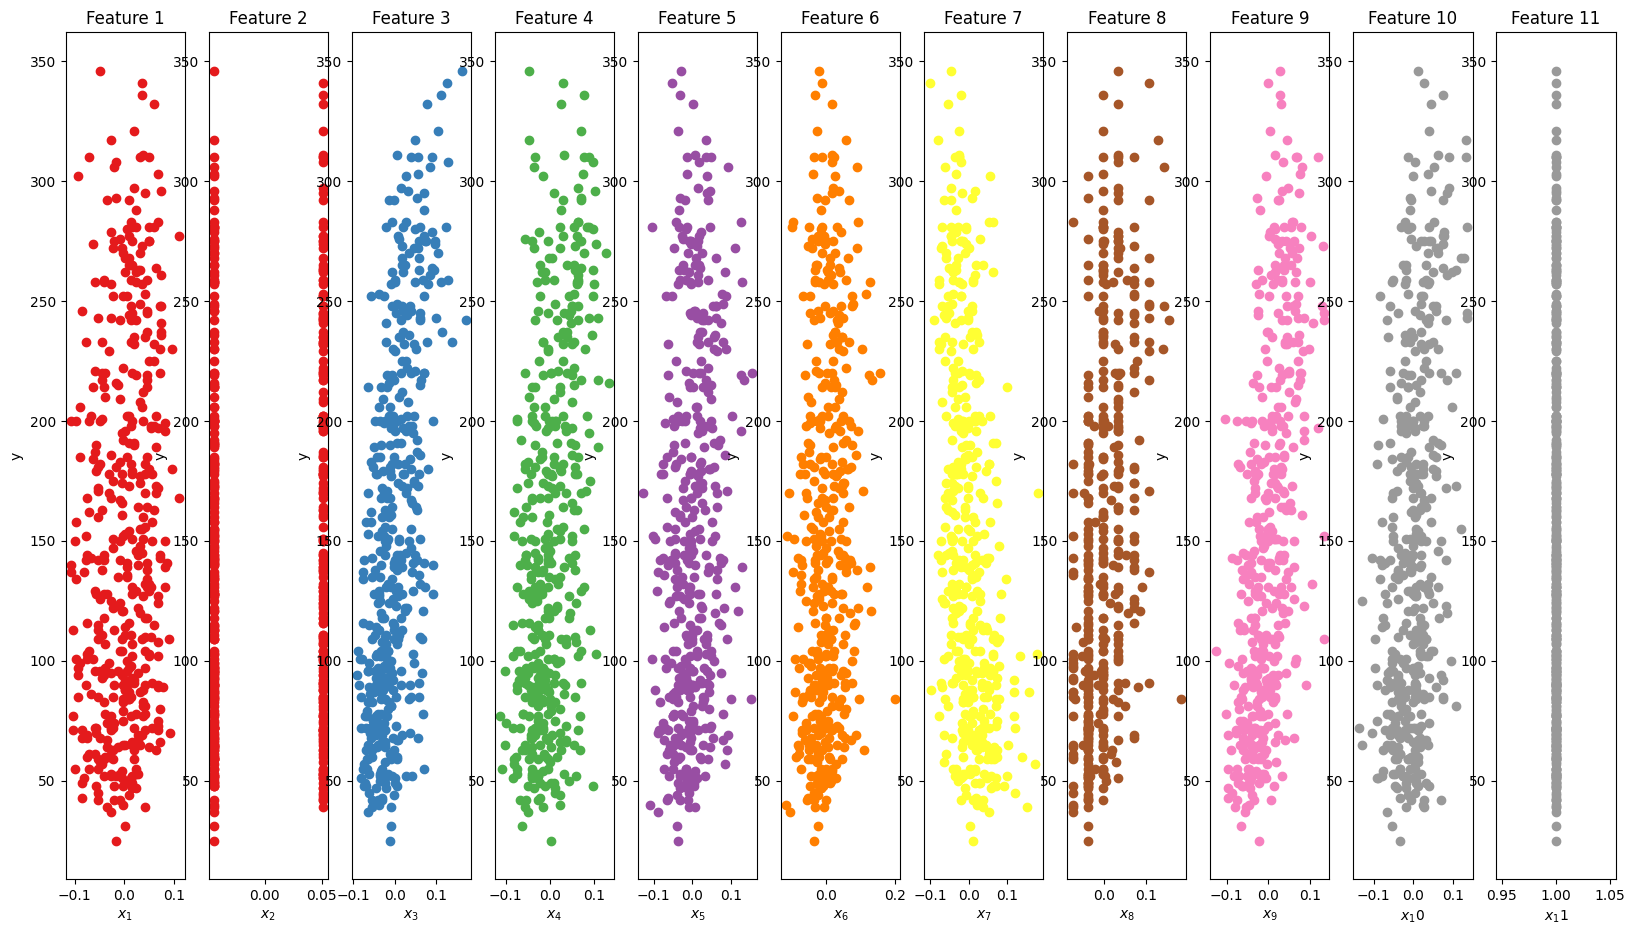

In [24]:
# Visualize the Features

num_features = x.shape[1]

plt.figure(figsize=(20, 1*num_features))

colors = plt.cm.Set1(np.linspace(0, 1, num_features)) # make an iterable of colors

for feature in range(num_features):
    plt.subplot(1, num_features, feature+1)
    plt.scatter(x[:,feature],y,color = colors[feature])
    plt.title(f"Feature {feature+1}")
    plt.xlabel(f"$x_{feature+1}$")
    plt.ylabel("y")

In [25]:
# Split Dataset
# Pick 80:20 split

num_train = int(0.8*x.shape[0])
num_test = x.shape[0] - num_train
print(num_train, num_test)

x_train = x[0:num_train,:]
y_train = y[0:num_train]

x_test = x[num_train::,:]
y_test = y[num_train::]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

353 89
(353, 11) (353,)
(89, 11) (89,)


### Write your LMS functions

In [26]:
# Define Loss Function
def mean_squared_error(x : np.ndarray, y : np.ndarray, theta : np.ndarray) -> np.ndarray:
    yhat = x @ theta # apply weights to data to get prediction yhat
    error = yhat - y # get the error
    loss = (1 / len(y)) * np.sum(error ** 2) # mean squared error
    return loss

# Define GD calculation
def calculate_gradient_and_update(x: np.ndarray, y: np.ndarray, theta: np.ndarray, alpha: float) -> tuple([float, np.ndarray]):
    gradient = (1 / len(y)) * x.T @ ((x @ theta) - y) # use the above formula to calculate the gradient of the loss
    theta_new = theta - (alpha * gradient) # update the parameters according to our update function
    loss = mean_squared_error(x, y, theta_new) # find the new loss
    return loss, theta_new

### Learn your LMS parameters

Final loss: 2899.122291153276


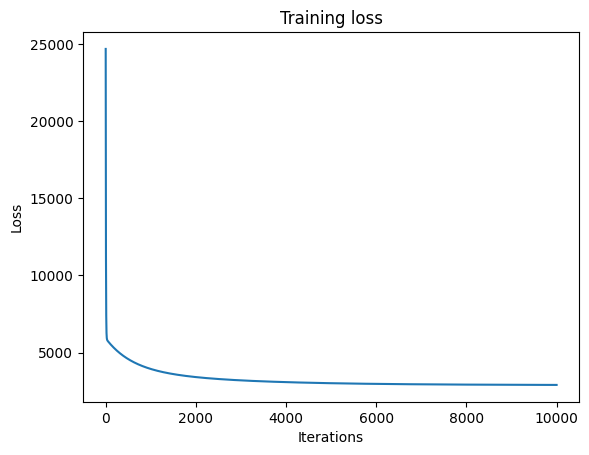

In [30]:
loss_history = []
num_epochs = 10000 # how many times we iterate through our whole dataset, element by element
# note: epoch and iteration is different. iteration is the number of times required to go through all training samples. 
# epoch is when all iterations of training samples have been completed.
ALPHA = 0.1

theta = np.random.uniform(-2,2,(num_features)) # initialize our starting weights

# for e in range(num_epochs):
#     for i in range(num_train):
#         # note: see how the x and y inputs to this function is different in this case (SGD) than that of batch gradient descent above. 
#         # in the case of batch gradient descent, we fed in the entire 30 samples of x and y matrices,
#         # whereas in the case of SGD here, we only feed in x and y one sample at a time
#         loss, theta = calculate_gradient_and_update(np.expand_dims(x_train[i,:],0), np.expand_dims(y_train[i],0), theta, ALPHA) # we update the size 
#         loss_history.append(loss)

for t in range(num_epochs):
    # in batch gradient descent, we perform the weight update once for the entire training data (all 30 samples of x)
    loss, theta = calculate_gradient_and_update(x, y, theta, ALPHA)
    loss_history.append(loss)

# The function calculate_gradient_and_update takes in x and y as 2-dimensional arrays.
# We need to reshape x[i,:] and y[i] from (i,) to (1,i) or (sample, feature) using np.expand_dims(x[i,:],0)
# print(f'Shape of x before expansion {np.shape(x_train[i,:])}')
# print(f'Shape of x after np.expand_dims {np.shape(np.expand_dims(x_train[i,:],0))}')

print(f'Final loss: {loss}')

# plot the losses over time
plt.figure(2)
plt.plot(loss_history);
plt.title('Training loss');
plt.xlabel('Iterations');
plt.ylabel('Loss');


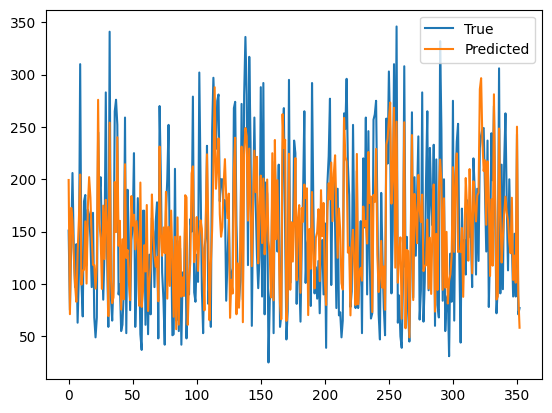

In [31]:
# Visualize Prediction

y_hat = x_train @ theta

plt.figure()
plt.plot(y_train)
plt.plot(y_hat)
plt.legend(['True', 'Predicted'])

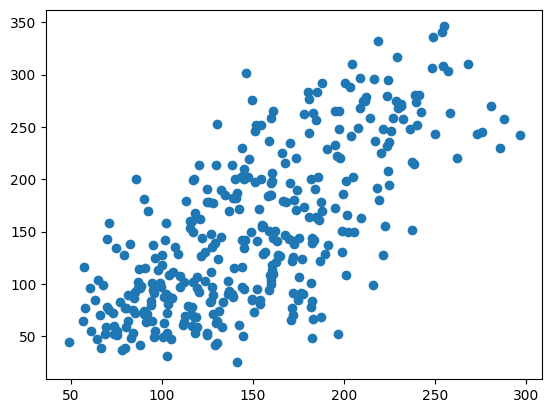

In [32]:
plt.scatter(x_train @ theta, y_train)

### Feature selection - which one matters the most? The least?
Provide a 1 to 10 ranking of each feature, 1 being the most useful features and 10 being the least useful.

(There could be multiple ways to answer, just show your work)